In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




In [3]:
df = pd.read_csv('series_g.csv', sep = ';')

In [4]:
df.head(3)

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132


In [9]:
# преобразуем строчки с датами в объект dataframe 

df['date'] = pd.to_datetime(df['date'], format='%b %Y')


In [10]:
df['date'].head(3)

0   1949-01-01
1   1949-02-01
2   1949-03-01
Name: date, dtype: datetime64[ns]

In [11]:
# построим график
def plot_data(X,Y):
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    Y.plot(ax=ax1)
    ax1.set_title(u'Объем пассажироперевозок')
    ax1.set_ylabel(u'Тысяч человек')
    
    ax2 = fig.add_subplot(122)
    pd.Series(np.log10(Y)).plot(ax = ax2)
    ax2.set_title(u'log10 от объема пассажироперевозок')
    ax2.set_ylabel(u'log10 от тысяч человек')

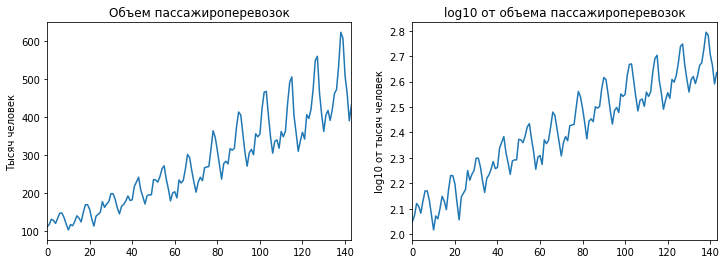

In [13]:
X = df['date']
Y = df['series_g']
plot_data(X,Y)

In [17]:
# необходимо добавить индекаторы месяцев
# создаем последовательность месцев

new_dates = pd.date_range('1961-01-01', '1961-12-01', freq='MS')

# Приводим df['date'] к типу Index, объединяем с 12 мес

new_dates = pd.Index(df['date']) | new_dates

# создаем дэйта фрейм из одной колонки с расширенным набором дат

df2 = pd.DataFrame({'date': new_dates})

# объединяем 2 дэйтафрейма по колонке 'date'

df = pd.merge(df, df2, on='date', how='right')


In [49]:
df.head()

,date,series_g,month_num,log_y,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
0,1949-01-01,112.0,1,2.049218,True,False,False,False,False,False,False,False,False,False,False,False
1,1949-02-01,118.0,2,2.071882,False,True,False,False,False,False,False,False,False,False,False,False
2,1949-03-01,132.0,3,2.120574,False,False,True,False,False,False,False,False,False,False,False,False
3,1949-04-01,129.0,4,2.110590,False,False,False,True,False,False,False,False,False,False,False,False
4,1949-05-01,121.0,5,2.082785,False,False,False,False,True,False,False,False,False,False,False,False


In [21]:
# создадим регрессионную переменную

df['month_num'] = range(1, len(df)+1)
df['log_y'] = np.log10(df['series_g'])

In [22]:
df.head()

,date,series_g,month_num,log_y
0,1949-01-01,112.0,1,2.049218
1,1949-02-01,118.0,2,2.071882
2,1949-03-01,132.0,3,2.120574
3,1949-04-01,129.0,4,2.110590
4,1949-05-01,121.0,5,2.082785


In [23]:
# создадим 12 колонок (индексы месяцев)

for x in range(1,13):
    df['season_' + str(x)] = df['date'].dt.month == x

In [24]:
df.head()

,date,series_g,month_num,log_y,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
0,1949-01-01,112.0,1,2.049218,True,False,False,False,False,False,False,False,False,False,False,False
1,1949-02-01,118.0,2,2.071882,False,True,False,False,False,False,False,False,False,False,False,False
2,1949-03-01,132.0,3,2.120574,False,False,True,False,False,False,False,False,False,False,False,False
3,1949-04-01,129.0,4,2.110590,False,False,False,True,False,False,False,False,False,False,False,False
4,1949-05-01,121.0,5,2.082785,False,False,False,False,True,False,False,False,False,False,False,False


In [25]:
# в данных присутствует коллениарность 
# устранить можно исключением 1 индикатора
# за базу возьмем мес январь
# xrange(2,13) соответствует всем месяцам с февраля по дек

season_columns = ['season_' + str(x) for x in range(2,13)]

# создадим объкты Х и вектор у для обучения модели

X = df[['month_num'] + season_columns]
y = df['log_y']

# оставим только те строчки, у которых известны значения

X1 = X[X.index < 144]
y1 = y[y.index < 144]


In [31]:
# настраиваем регрессионную модель

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

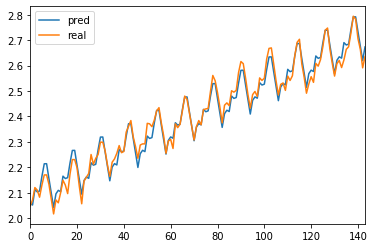

In [34]:
# применяю модель к своим историческим данным

pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': y1
})
pred.plot();

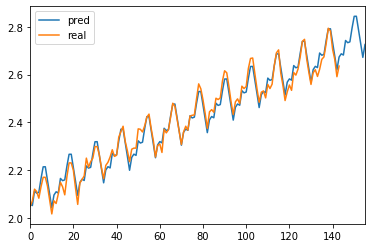

In [36]:
# теперь посторим прогноз

pred = pd.DataFrame({
    'pred' : model.predict(X),
    'real' : y
})
pred.plot();

In [38]:
print(pred)

         pred      real
0    2.057187  2.049218
1    2.051982  2.071882
2    2.112912  2.120574
3    2.103705  2.110590
4    2.107047  2.082785
..        ...       ...
151  2.844005       NaN
152  2.785564       NaN
153  2.729935       NaN
154  2.671892       NaN
155  2.725716       NaN

[156 rows x 2 columns]


In [51]:
pred2 = 10**pred


pred2.tail(24)

,pred,real
132,430.923853,417.0
133,425.789622,391.0
134,489.919605,419.0
135,479.642607,461.0
136,483.348256,472.0
137,551.671316,535.0
138,618.293682,622.0
139,618.772405,606.0
140,540.866091,508.0
141,475.840298,461.0
